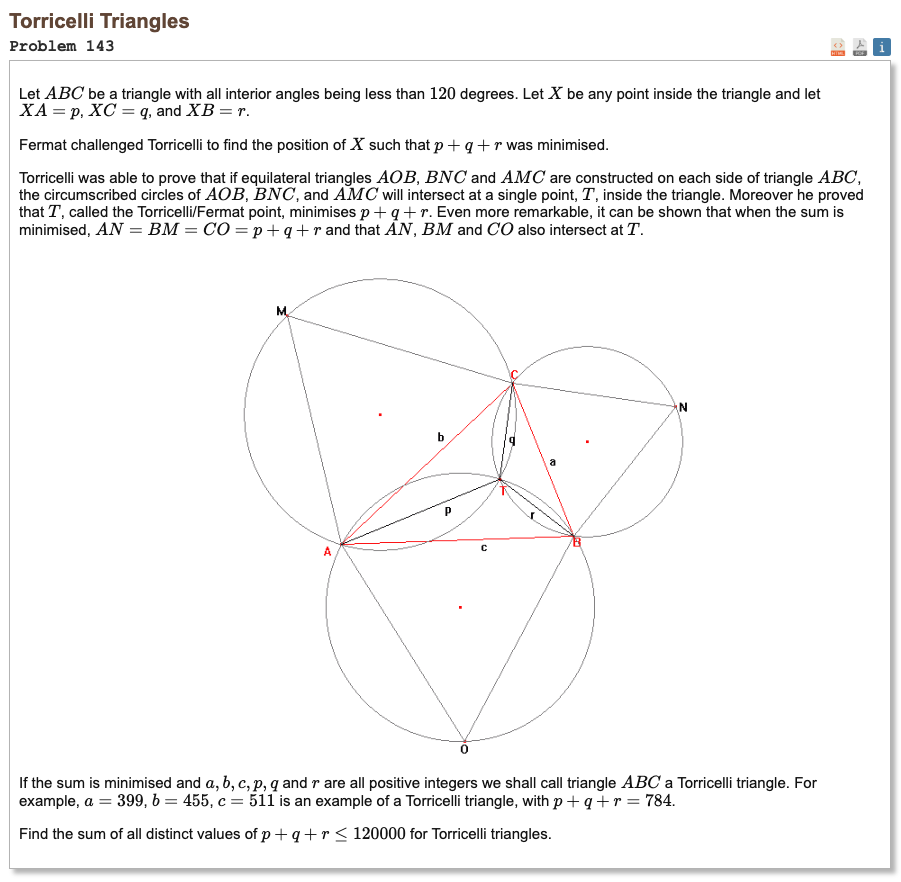

## Initial approach

* use the fermat point fact that angles apb bpc cpa are 120 degrees at the minimizer
* with x=pa y=pb z=pc this gives a²=y²+yz+z² b²=z²+zx+x² c²=x²+xy+y²
* so each triangle side comes from a pair (u v) with u²+uv+v² a perfect square
* generate all such pairs efficiently by eisenstein parametrization u=m²−n² v=2mn+n² w=m²+mn+n² and take multiples
* build an undirected graph whose nodes are distances and edges connect u v labeled by side length w
* any 3 nodes that are pairwise connected form a torricelli triangle with perimeter p=w₁+w₂+w₃
* collect distinct perimeters p not exceeding the limit and sum them up
* iterate neighbors with ordering to avoid double counting and keep everything deduped with sets

In [1]:
import math
from collections import defaultdict

def torricelli_sum(limit=120000):
    edges = defaultdict(dict)
    def add_edge(u, v, w):
        if w > limit:
            return
        if v not in edges[u] or w < edges[u][v]:
            edges[u][v] = w
            edges[v][u] = w

    max_m = int(math.sqrt(limit)) + 2
    for m in range(2, max_m * 10):
        for n in range(1, m):
            if math.gcd(m, n) != 1:
                continue
            u0 = m*m - n*n
            v0 = 2*m*n + n*n
            w0 = m*m + m*n + n*n
            if u0 <= 0 or v0 <= 0:
                continue
            k = 1
            while True:
                u = k * u0
                v = k * v0
                w = k * w0
                if w > limit:
                    break
                add_edge(u, v, w)
                k += 1

    perims = set()
    for y, nbrs in edges.items():
        items = [(z, w) for z, w in nbrs.items() if z > y]
        items.sort()
        for i in range(len(items)):
            z, w_yz = items[i]
            nz = edges[z]
            for j in range(i + 1, len(items)):
                x, w_yx = items[j]
                if x in nz:
                    w_xz = nz[x]
                    p = w_yz + w_yx + w_xz
                    if p <= limit:
                        perims.add(p)
    return sum(perims)

result = torricelli_sum(120000)
print("Result:", result)

Result: 16574004
